In [1]:
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

%matplotlib inline
plt.style.use('seaborn')

In [2]:
df= pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
cols_df = ['cp','sex']

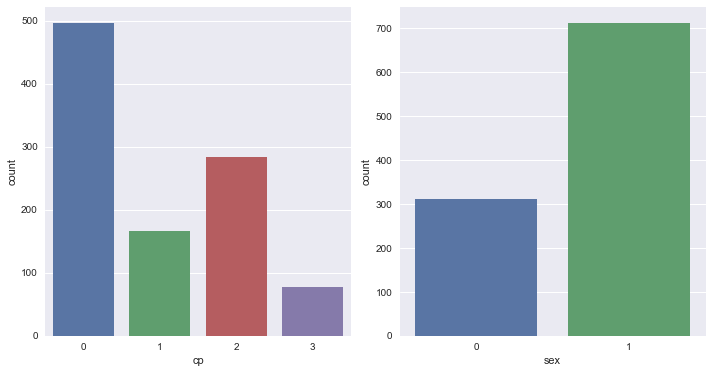

In [10]:
plt.figure(figsize=(10,10))
for i in range(len(cols_df)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=cols_df[i], data=df)
    
plt.tight_layout()

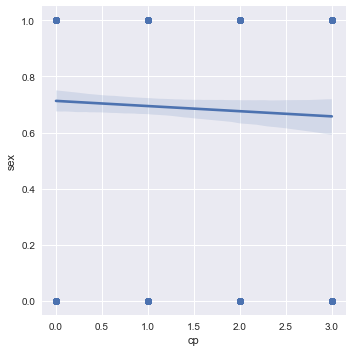

In [11]:
sns.lmplot(x='cp',y='sex',data=df)

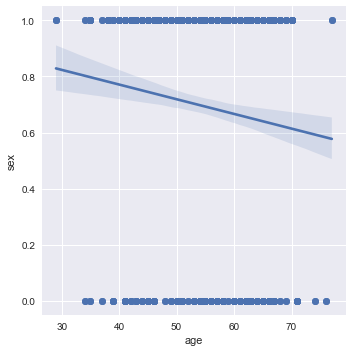

In [12]:
sns.lmplot(x='age',y='sex',data=df)

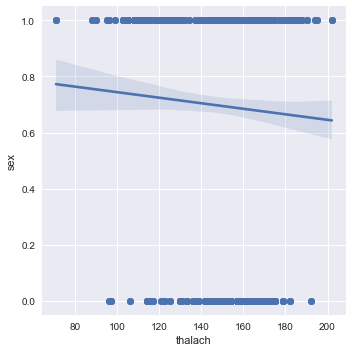

In [13]:
sns.lmplot(x='thalach',y='sex',data=df)

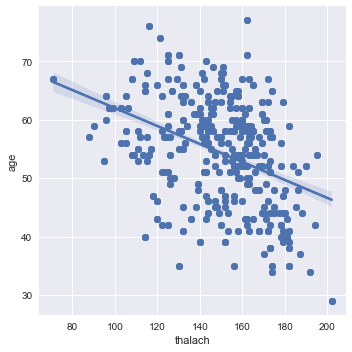

In [14]:
sns.lmplot(x='thalach',y='age',data=df)

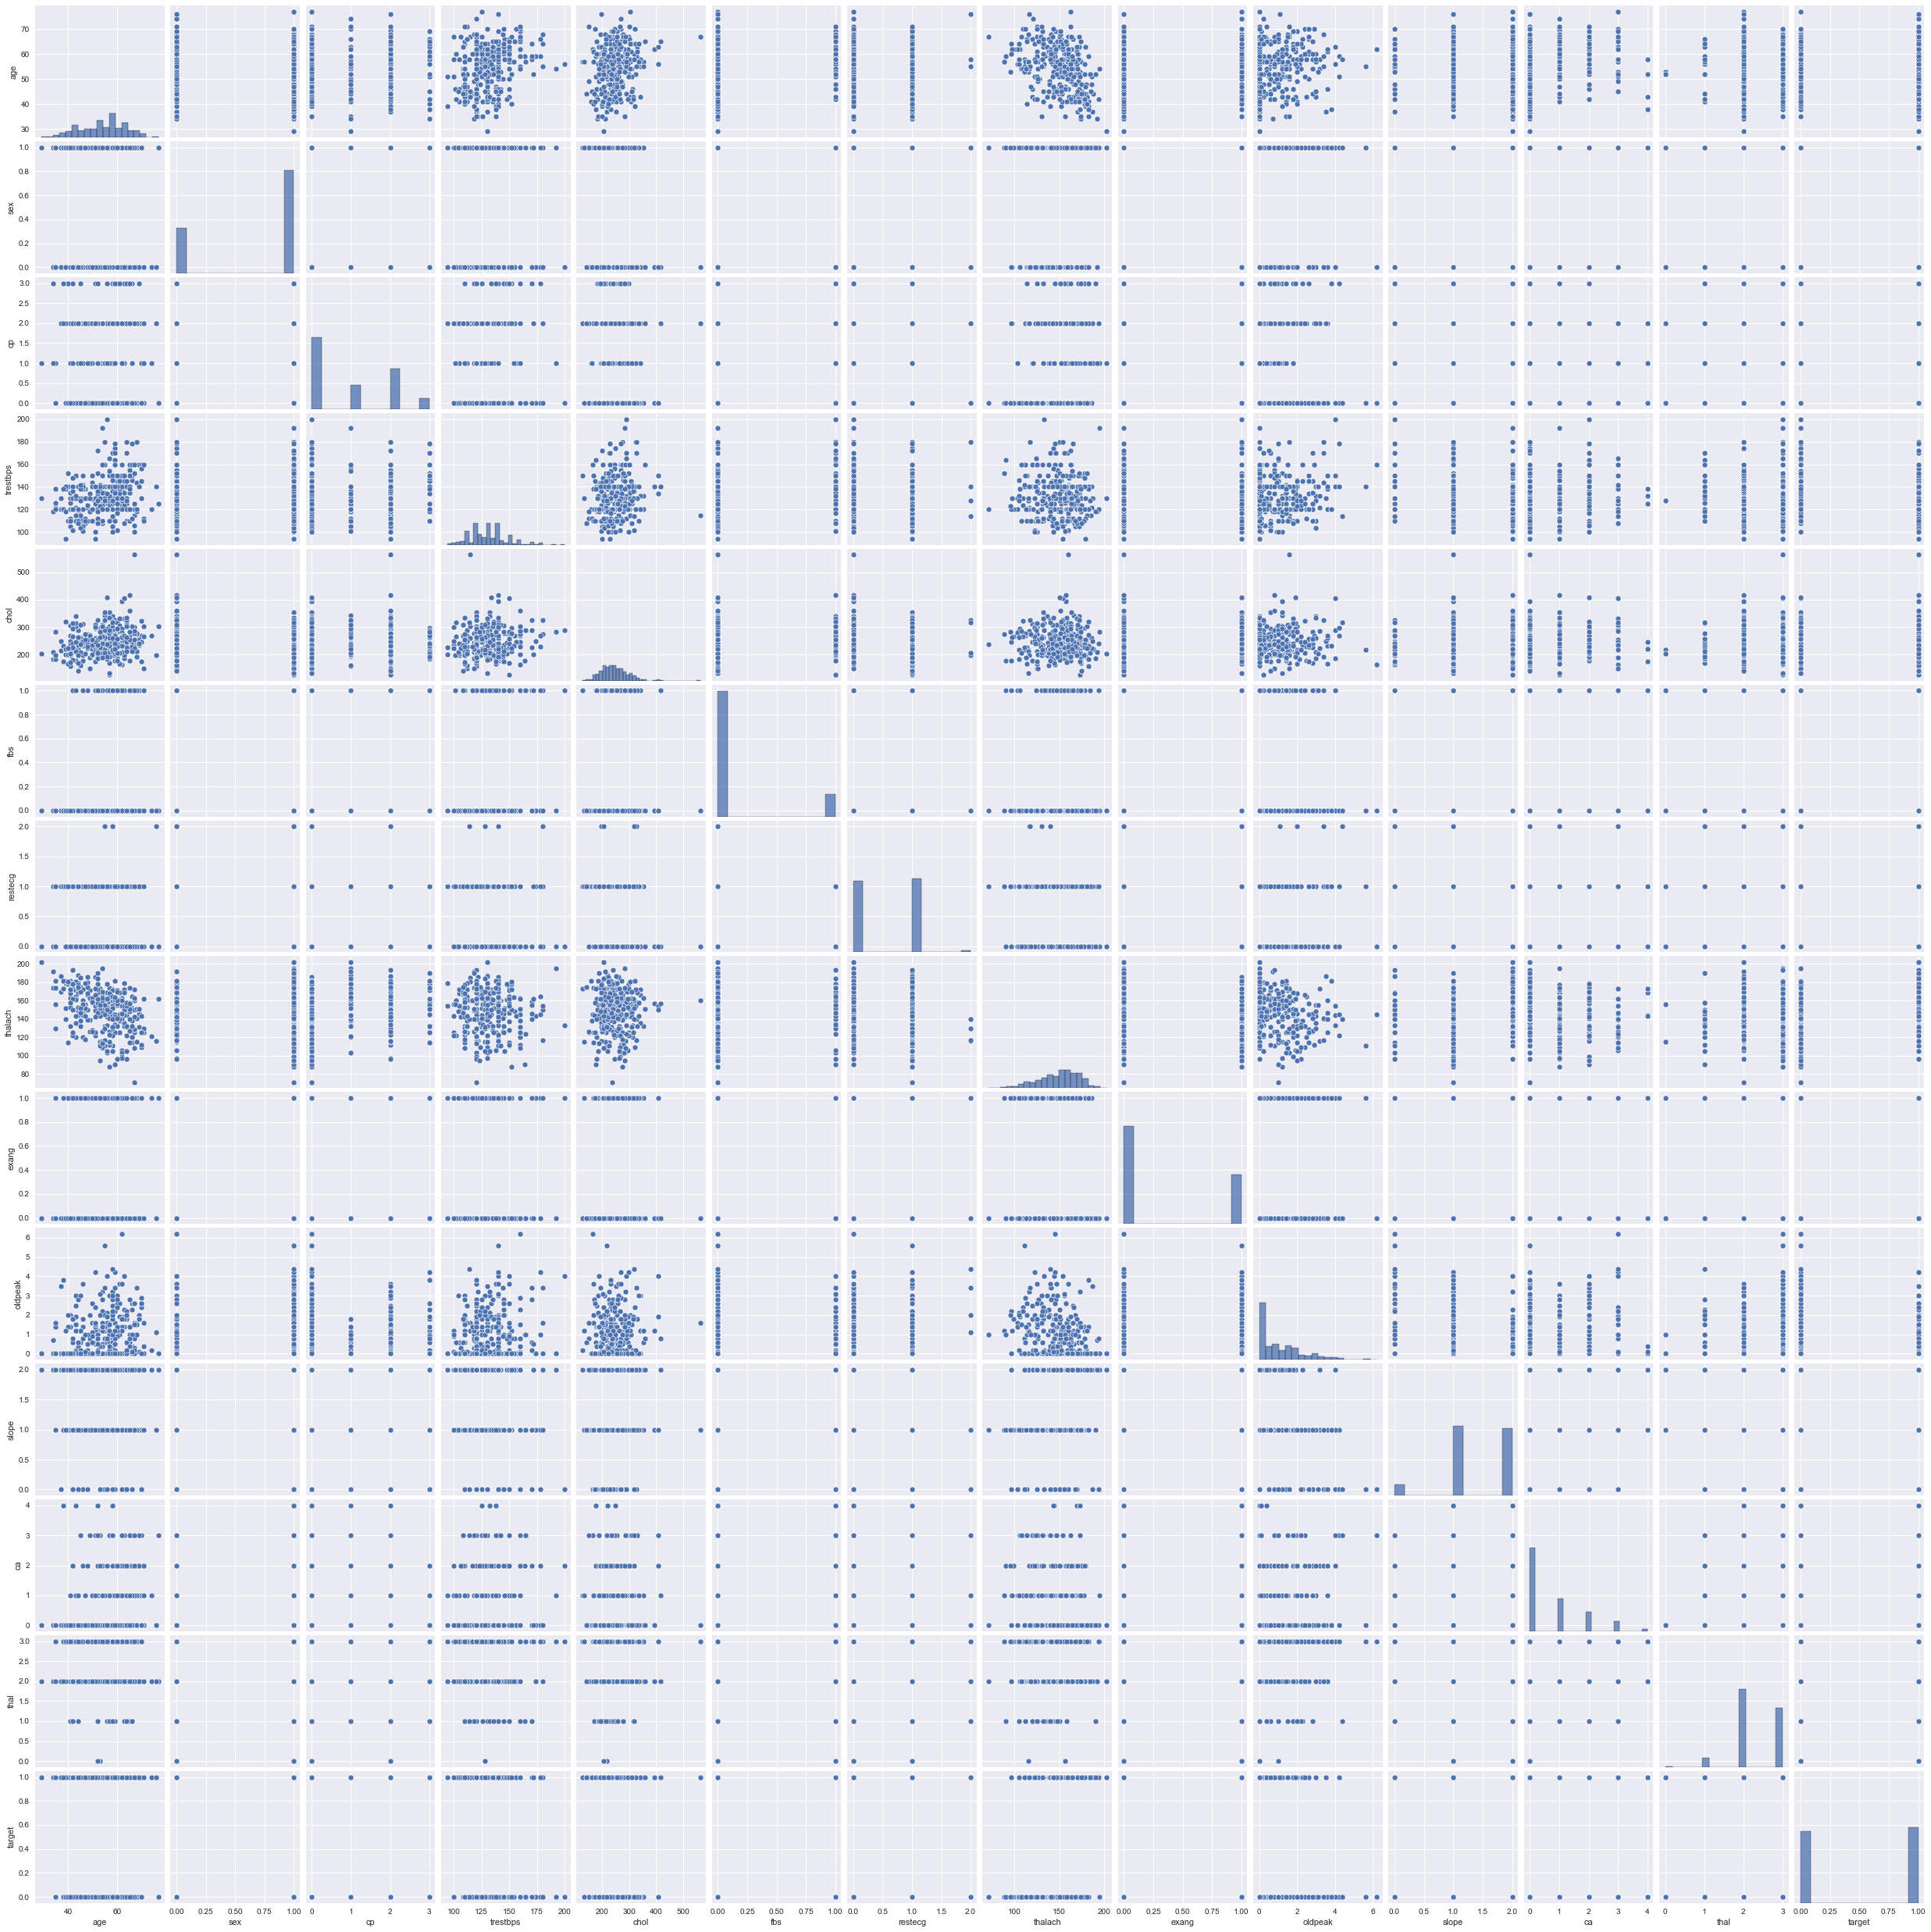

In [15]:
sns.pairplot(df)

<AxesSubplot:>

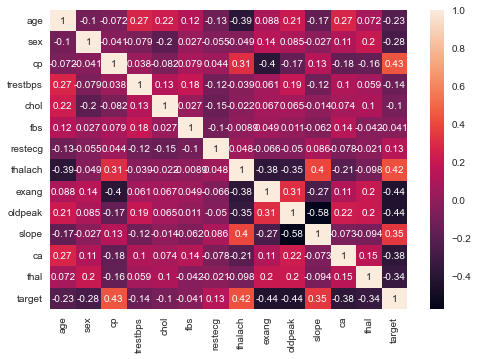

In [16]:
sns.heatmap(df.corr(),annot=True)

In [20]:
y = df['age']
X = df.drop('slope',axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (768, 12)
x test:  (257, 12)
y train:  (768,)
y test:  (257,)


In [22]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<AxesSubplot:>

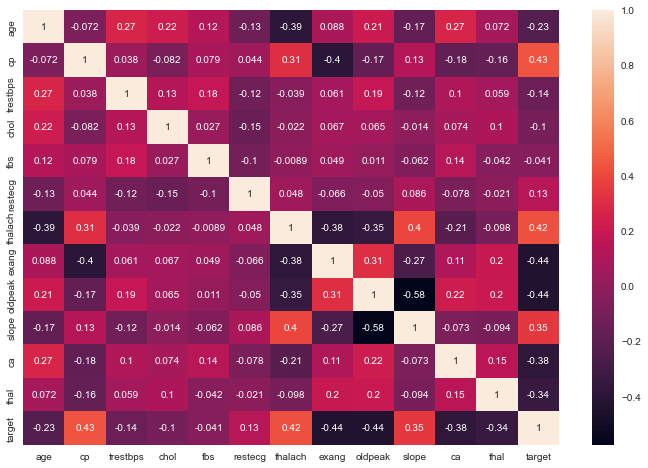

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [25]:
R2_train = []
R2_test = []
CV = []
MAE=[]
MSE=[]
RMSE=[]

def heart_attack(model):
    
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,3))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,3))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,3))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,3))
    print("Test R2-score :",round(R2_test_model,3))
    print("CV scores mean :",round(cv_mean,3))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    plt.show()
    
    predictions=model.predict(X_test)
    plt.scatter(y_test,predictions)
    plt.plot(y_test,y_test,'r')
    plt.show()
    
    # Regression evaluation metrics
    MAE_model = metrics.mean_absolute_error(y_test, y_pred_test)
    MSE_model = metrics.mean_squared_error(y_test, y_pred_test)
    RMSE_model = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    MAE.append(round(MAE_model,3))
    MSE.append(round(MSE_model,3))
    RMSE.append(round(RMSE_model,3))
    
    print('MAE:', round(MAE_model,3))
    print('MSE:', round(MSE_model,3))
    print('RMSE:', round(RMSE_model,3))

Train R2-score : 1.0
Test R2-score : 1.0
CV scores mean : 1.0


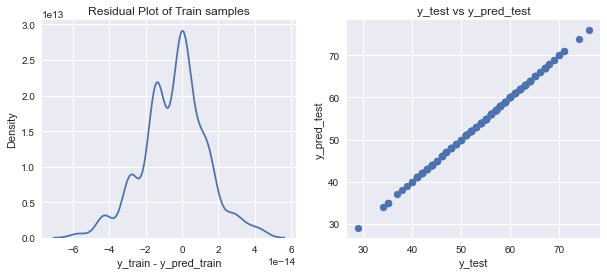

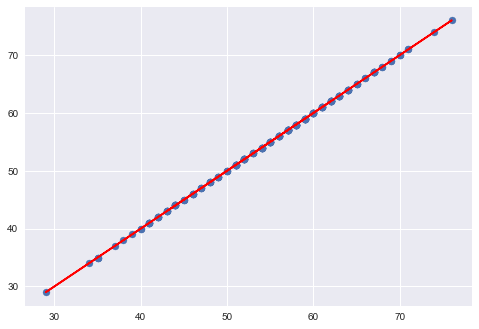

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)
heart_attack(lr)

Train R2-score : 1.0
Test R2-score : 1.0
CV scores mean : 1.0


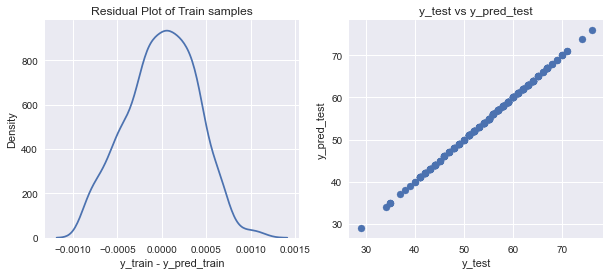

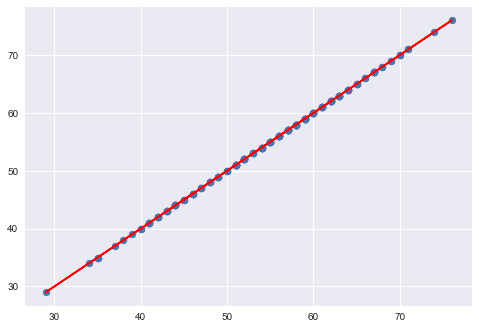

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [27]:
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))
rg_rs.fit(X_train,y_train)

heart_attack(rg_rs)

Train R2-score : 1.0
Test R2-score : 1.0
CV scores mean : 1.0


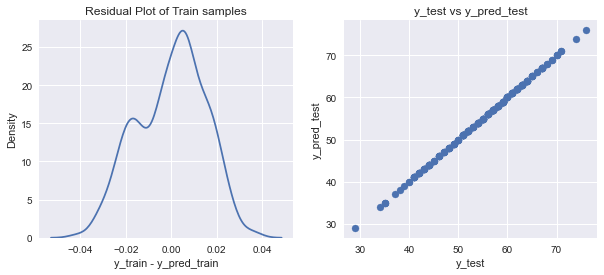

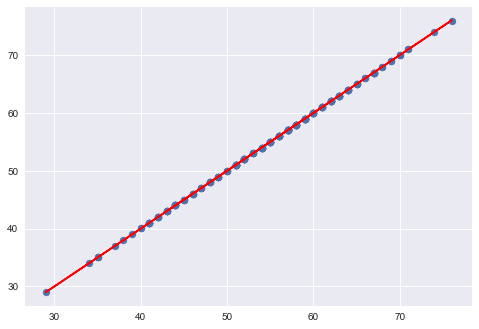

MAE: 0.011
MSE: 0.0
RMSE: 0.014


In [28]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
ls_rs.fit(X_train,y_train)

heart_attack(ls_rs)

Train R2-score : 1.0
Test R2-score : 1.0
CV scores mean : 1.0


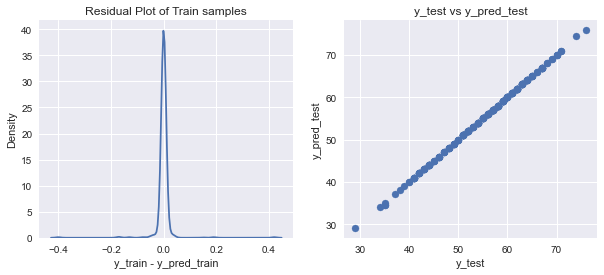

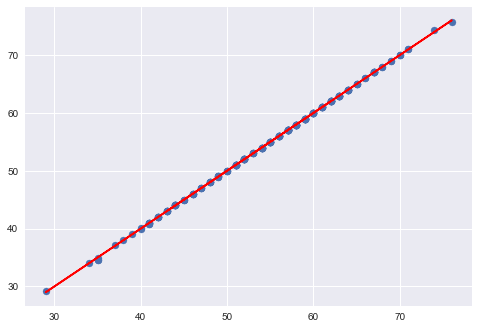

MAE: 0.009
MSE: 0.003
RMSE: 0.05


In [29]:
rf = RandomForestRegressor(max_depth=8,n_estimators=100)

rf.fit(X_train,y_train)

heart_attack(rf)

Train R2-score : 1.0
Test R2-score : 1.0
CV scores mean : 1.0


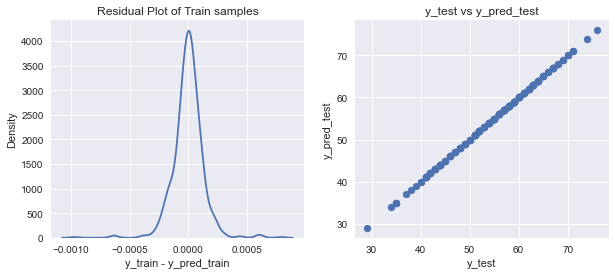

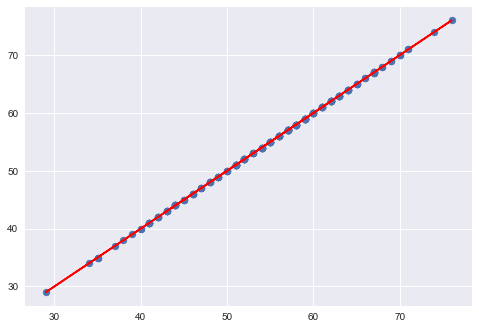

MAE: 0.0
MSE: 0.0
RMSE: 0.002


In [30]:
gb= GradientBoostingRegressor(learning_rate = 0.2, n_estimators=500)

gb.fit(X_train,y_train)

heart_attack(gb)

In [31]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R2_Squared_Train': R2_train,'R2_Squared_Test': R2_test,'CV_score_mean': CV
                      , 'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE})
results.sort_values(ascending= False , by = ['R2_Squared_Test'])

,Model,R2_Squared_Train,R2_Squared_Test,CV_score_mean,MAE,MSE,RMSE
0,LinearRegression,1.0,1.0,1.0,0.000,0.000,0.000
1,Ridge,1.0,1.0,1.0,0.000,0.000,0.000
2,Lasso,1.0,1.0,1.0,0.011,0.000,0.014
3,RandomForestRegressor,1.0,1.0,1.0,0.009,0.003,0.050
4,GradientBoostingRegressor,1.0,1.0,1.0,0.000,0.000,0.002


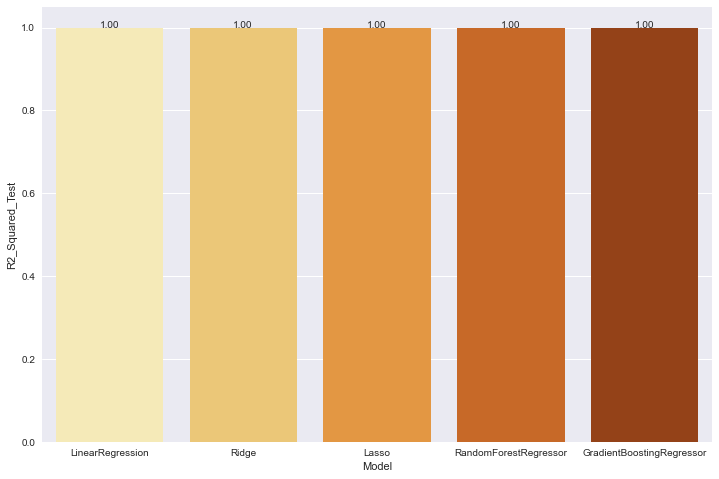

In [32]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model", y="R2_Squared_Test", data= results, palette="YlOrBr")
show_values_on_bars(ax)

In [33]:
from tensorflow.keras.layers import Dropout

model=Sequential()

model.add(Dense(512,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [34]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [35]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=200)

Epoch 1/200
6/6 [==============================] - 1s 64ms/step - loss: 2989.2629 - mae: 53.8875 - val_loss: 2950.0288 - val_mae: 53.6584
Epoch 2/200
6/6 [==============================] - 0s 22ms/step - loss: 2847.3699 - mae: 52.5573 - val_loss: 2756.8030 - val_mae: 51.8377
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 2602.6143 - mae: 50.1924 - val_loss: 2425.1157 - val_mae: 48.5484
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 2188.1653 - mae: 45.8921 - val_loss: 1884.1036 - val_mae: 42.6318
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 1552.1129 - mae: 38.3188 - val_loss: 1118.6655 - val_mae: 32.4104
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 761.3835 - mae: 25.6172 - val_loss: 339.6755 - val_mae: 16.3567
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 173.4523 - mae: 10.6435 - val_loss: 135.6276 - val_mae: 9.4603
Epoch 8/200
6/6 [=========================

6/6 [==============================] - 0s 8ms/step - loss: 0.2814 - mae: 0.3954 - val_loss: 0.3907 - val_mae: 0.4603
Epoch 64/200
6/6 [==============================] - 0s 8ms/step - loss: 0.2600 - mae: 0.3797 - val_loss: 0.3552 - val_mae: 0.4387
Epoch 65/200
6/6 [==============================] - 0s 8ms/step - loss: 0.2394 - mae: 0.3659 - val_loss: 0.3315 - val_mae: 0.4247
Epoch 66/200
6/6 [==============================] - 0s 8ms/step - loss: 0.2236 - mae: 0.3518 - val_loss: 0.3043 - val_mae: 0.4071
Epoch 67/200
6/6 [==============================] - 0s 8ms/step - loss: 0.2051 - mae: 0.3348 - val_loss: 0.2860 - val_mae: 0.3911
Epoch 68/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1887 - mae: 0.3212 - val_loss: 0.2614 - val_mae: 0.3752
Epoch 69/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1744 - mae: 0.3062 - val_loss: 0.2442 - val_mae: 0.3595
Epoch 70/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1627 - mae: 0.2970 - val_loss

Epoch 126/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0247 - mae: 0.1114 - val_loss: 0.0390 - val_mae: 0.1359
Epoch 127/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0245 - mae: 0.1143 - val_loss: 0.0405 - val_mae: 0.1330
Epoch 128/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0244 - mae: 0.1122 - val_loss: 0.0380 - val_mae: 0.1336
Epoch 129/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0239 - mae: 0.1093 - val_loss: 0.0377 - val_mae: 0.1446
Epoch 130/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0243 - mae: 0.1125 - val_loss: 0.0366 - val_mae: 0.1328
Epoch 131/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0234 - mae: 0.1113 - val_loss: 0.0393 - val_mae: 0.1292
Epoch 132/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0235 - mae: 0.1101 - val_loss: 0.0355 - val_mae: 0.1342
Epoch 133/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0224 - 

6/6 [==============================] - 0s 8ms/step - loss: 0.0130 - mae: 0.0840 - val_loss: 0.0223 - val_mae: 0.1034
Epoch 189/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0128 - mae: 0.0831 - val_loss: 0.0221 - val_mae: 0.1045
Epoch 190/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0127 - mae: 0.0835 - val_loss: 0.0229 - val_mae: 0.1000
Epoch 191/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0128 - mae: 0.0838 - val_loss: 0.0221 - val_mae: 0.1007
Epoch 192/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0127 - mae: 0.0829 - val_loss: 0.0217 - val_mae: 0.1017
Epoch 193/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0128 - mae: 0.0825 - val_loss: 0.0220 - val_mae: 0.1110
Epoch 194/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0131 - mae: 0.0856 - val_loss: 0.0213 - val_mae: 0.1041
Epoch 195/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0127 - mae: 0.0843 - v

In [36]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

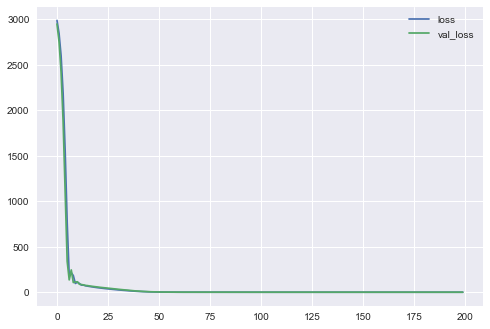

In [37]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

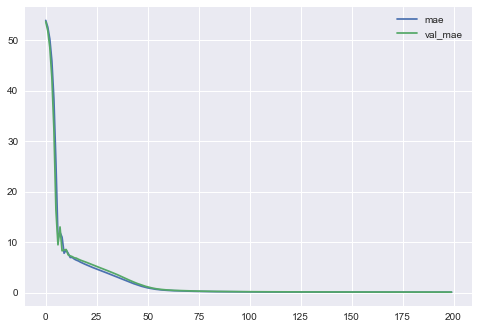

In [38]:
losses[['mae','val_mae']].plot()

In [39]:
predictions=model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [40]:
predictions

array([[62.09479 ],
       [52.92457 ],
       [54.906826],
       [49.866653],
       [47.958687],
       [73.92656 ],
       [63.991776],
       [67.03113 ],
       [48.011963],
       [70.14392 ],
       [59.927876],
       [58.97805 ],
       [41.944447],
       [56.839226],
       [55.900883],
       [56.87899 ],
       [60.96288 ],
       [41.009087],
       [51.94935 ],
       [53.927967],
       [56.945168],
       [59.917305],
       [57.869366],
       [46.019924],
       [56.945168],
       [38.042477],
       [47.92855 ],
       [51.748756],
       [63.141304],
       [61.033806],
       [59.016945],
       [50.764023],
       [47.902283],
       [52.92457 ],
       [41.976574],
       [56.02321 ],
       [56.945168],
       [66.17606 ],
       [71.29791 ],
       [43.909443],
       [67.03113 ],
       [49.914185],
       [65.25052 ],
       [57.869366],
       [57.966682],
       [55.08703 ],
       [48.974068],
       [57.97545 ],
       [40.15905 ],
       [60.87947 ],


In [41]:
mean_abs_error=metrics.mean_absolute_error(predictions,y_test)
mean_abs_error

0.1020252138724123

In [42]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.1433396442691139

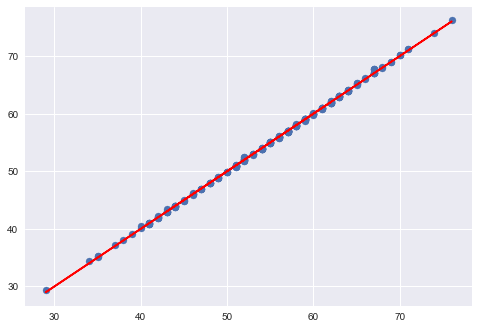

In [43]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [44]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0205 - mae: 0.1020


[0.020546238869428635, 0.10202504694461823]